In [1]:
import pandas as pd

data = pd.read_csv(r"zameen-updated.csv")

In [2]:
data.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,1.6 Kanal,For Sale,8,04-05-2019,NaN,NaN,Kanal,1.6,1-5 Kanal
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,1 Kanal,For Sale,8,01-04-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal


In [3]:
data.shape


(168446, 20)

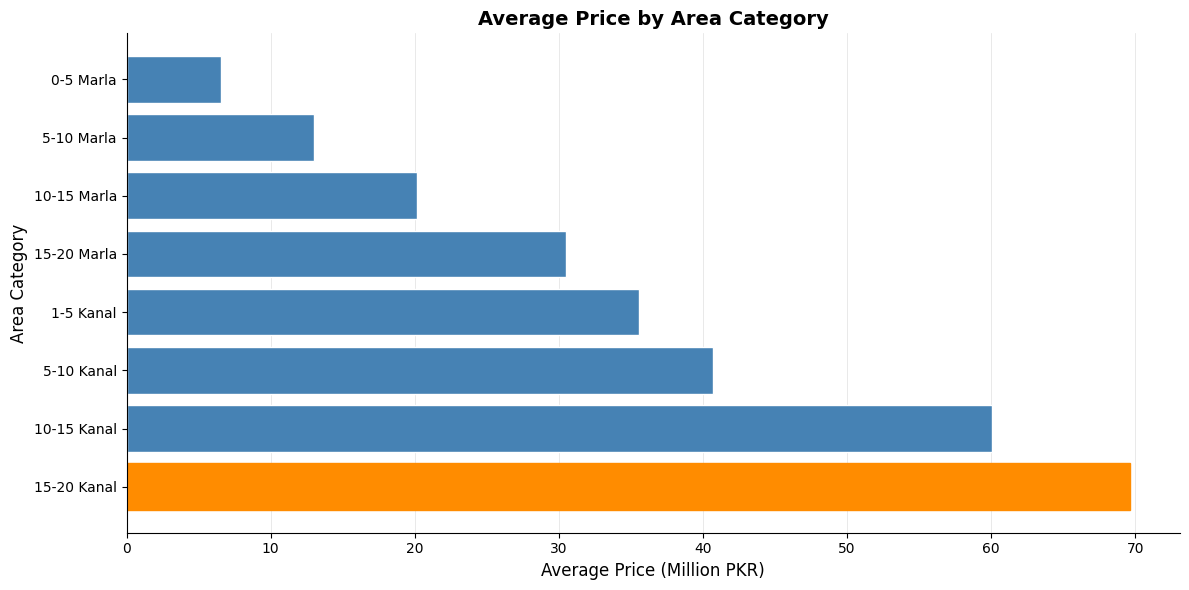


REAL ESTATE DATA SUMMARY
Total Properties Analyzed: 165,519
Average Price: PKR 15,281,970
Average Area Size: 5.77 units
Price Range: PKR 0 - PKR 160,000,000
Area Range: 0.00 - 16.00 units


In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# Load data
data = pd.read_csv(r"zameen-updated.csv")

# Ensure numeric values 
data['price'] = pd.to_numeric(data['price'], errors='coerce') 
data['Area Size'] = pd.to_numeric(data['Area Size'], errors='coerce') 

# Remove missing values
clean_data = data.dropna(subset=['price', 'Area Size'])

# Remove outliers for better visualization (optional)
# Keep values within 99th percentile
price_99 = clean_data['price'].quantile(0.99)
area_99 = clean_data['Area Size'].quantile(0.99)
clean_data = clean_data[(clean_data['price'] <= price_99) & (clean_data['Area Size'] <= area_99)]

# Create single figure
fig, ax = plt.subplots(figsize=(12, 6))

# ============================================
# Average Price by Area Category (Bar Chart)
# ============================================
if 'Area Category' in clean_data.columns:
    avg_price_by_category = (clean_data.groupby('Area Category')['price']
                              .mean()
                              .sort_values(ascending=False)
                              .head(8))  # Top 8 categories
    
    bars = ax.barh(avg_price_by_category.index, 
                    avg_price_by_category.values/1_000_000,
                    color='steelblue',
                    edgecolor='white',
                    linewidth=1)
    
    # Highlight the highest bar
    bars[0].set_color('darkorange')
    
    ax.set_title('Average Price by Area Category', fontsize=14, fontweight='bold')
    ax.set_xlabel('Average Price (Million PKR)', fontsize=12)
    ax.set_ylabel('Area Category', fontsize=12)
    ax.set_axisbelow(True)
    ax.grid(axis='x', color='#999999', linestyle='-', linewidth=0.5, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("REAL ESTATE DATA SUMMARY")
print("="*60)
print(f"Total Properties Analyzed: {len(clean_data):,}")
print(f"Average Price: PKR {clean_data['price'].mean():,.0f}")
print(f"Average Area Size: {clean_data['Area Size'].mean():.2f} units")
print(f"Price Range: PKR {clean_data['price'].min():,.0f} - PKR {clean_data['price'].max():,.0f}")
print(f"Area Range: {clean_data['Area Size'].min():.2f} - {clean_data['Area Size'].max():.2f} units")
print("="*60)

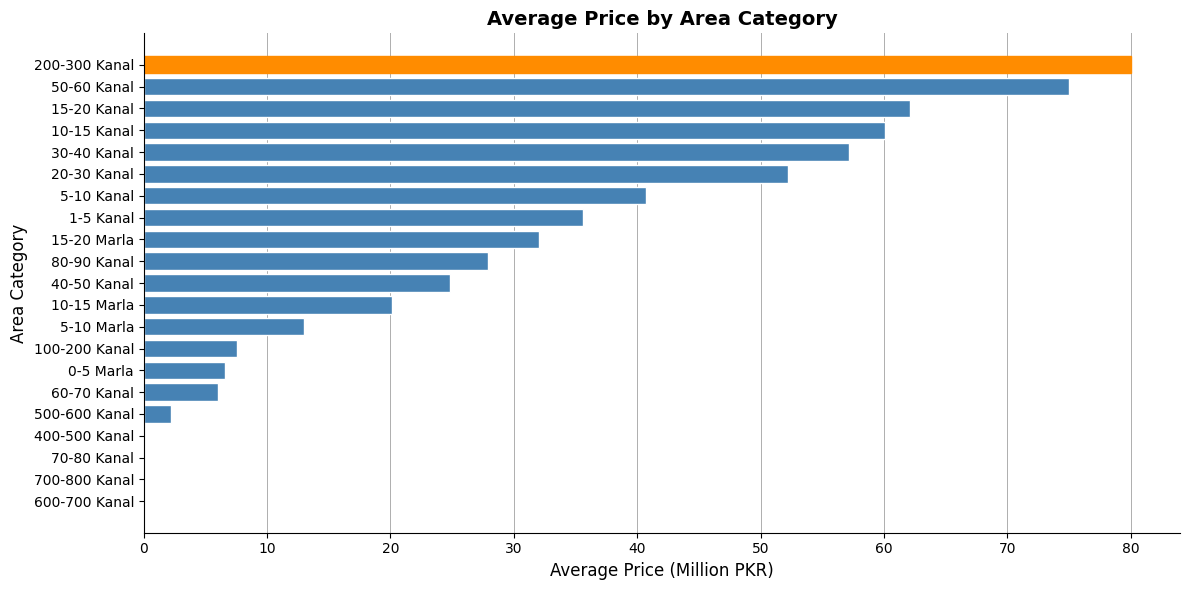


AVERAGE PRICE BY AREA CATEGORY
600-700 Kanal       : PKR 13,000
700-800 Kanal       : PKR 16,000
70-80 Kanal         : PKR 33,000
400-500 Kanal       : PKR 118,000
500-600 Kanal       : PKR 2,200,000
60-70 Kanal         : PKR 5,980,000
0-5 Marla           : PKR 6,577,143
100-200 Kanal       : PKR 7,560,000
5-10 Marla          : PKR 13,022,395
10-15 Marla         : PKR 20,124,651
40-50 Kanal         : PKR 24,824,800
80-90 Kanal         : PKR 27,899,625
15-20 Marla         : PKR 32,024,360
1-5 Kanal           : PKR 35,573,728
5-10 Kanal          : PKR 40,717,176
20-30 Kanal         : PKR 52,203,545
30-40 Kanal         : PKR 57,204,867
10-15 Kanal         : PKR 60,068,500
15-20 Kanal         : PKR 62,152,000
50-60 Kanal         : PKR 75,000,000
200-300 Kanal       : PKR 80,000,000


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# Load data
data = pd.read_csv(r"zameen-updated.csv")

# Ensure numeric values 
data['price'] = pd.to_numeric(data['price'], errors='coerce') 
data['Area Size'] = pd.to_numeric(data['Area Size'], errors='coerce') 

# Remove missing values
clean_data = data.dropna(subset=['price', 'Area Size', 'Area Category'])

# Remove outliers for better visualization
price_99 = clean_data['price'].quantile(0.99)
clean_data = clean_data[clean_data['price'] <= price_99]

# Calculate average price by Area Category
avg_price_by_category = (clean_data.groupby('Area Category')['price']
                          .mean()
                          .sort_values(ascending=True))

# Create single bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.barh(avg_price_by_category.index, 
               avg_price_by_category.values/1_000_000,
               color='steelblue',
               edgecolor='white',
               linewidth=1)

# Highlight the highest bar
bars[-1].set_color('darkorange')

# Titles and labels
ax.set_title('Average Price by Area Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Price (Million PKR)', fontsize=12)
ax.set_ylabel('Area Category', fontsize=12)

# Place grid behind bars
ax.set_axisbelow(True)
ax.grid(axis='x', color='#999999', linestyle='-', linewidth=0.7, alpha=0.8)

# Clean frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("AVERAGE PRICE BY AREA CATEGORY")
print("="*60)
for category, price in avg_price_by_category.items():
    print(f"{category:20s}: PKR {price:,.0f}")
print("="*60)

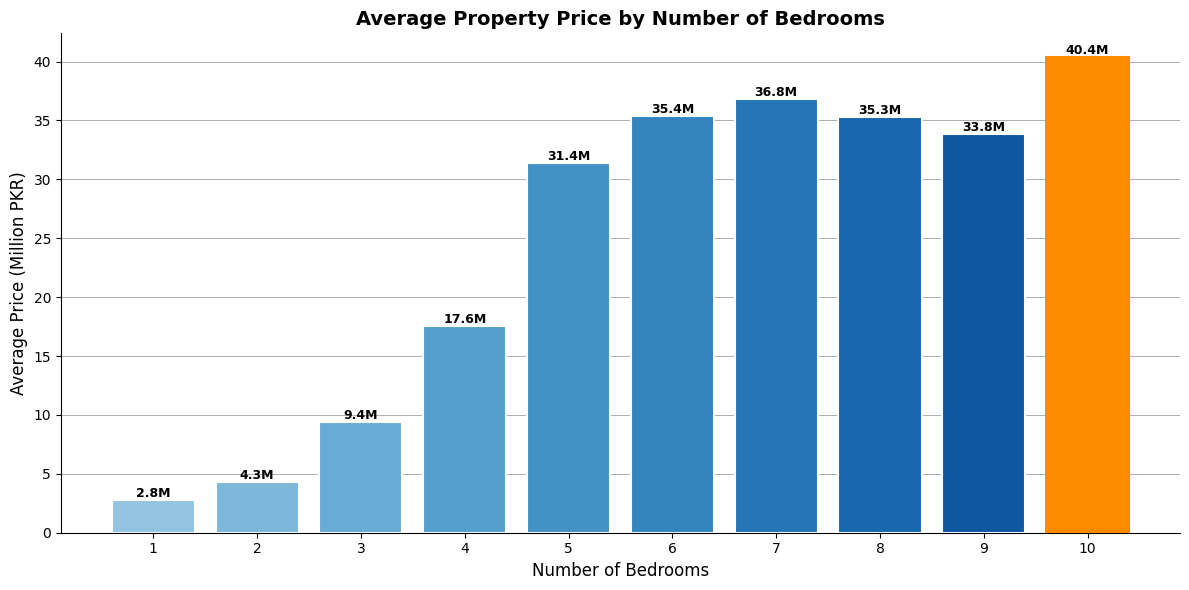


PRICE vs BEDROOMS ANALYSIS
Total Properties Analyzed: 144,011

Average Price by Number of Bedrooms:
------------------------------------------------------------
1 Bedroom(s): PKR 2,814,295 (Count: 4,433)
2 Bedroom(s): PKR 4,329,775 (Count: 30,738)
3 Bedroom(s): PKR 9,421,164 (Count: 45,849)
4 Bedroom(s): PKR 17,579,879 (Count: 22,967)
5 Bedroom(s): PKR 31,408,786 (Count: 23,205)
6 Bedroom(s): PKR 35,374,770 (Count: 11,376)
7 Bedroom(s): PKR 36,808,875 (Count: 2,777)
8 Bedroom(s): PKR 35,326,250 (Count: 1,364)
9 Bedroom(s): PKR 33,828,446 (Count: 729)
10 Bedroom(s): PKR 40,379,766 (Count: 573)

Most Expensive: 10 bedrooms at PKR 40,379,766
Least Expensive: 1 bedroom(s) at PKR 2,814,295


In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# Load data
data = pd.read_csv(r"zameen-updated.csv")

# Ensure numeric values 
data['price'] = pd.to_numeric(data['price'], errors='coerce') 
data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce') 

# Remove missing values
clean_data = data.dropna(subset=['price', 'bedrooms'])

# Remove outliers for better visualization
# Keep values within 99th percentile
price_99 = clean_data['price'].quantile(0.99)
clean_data = clean_data[clean_data['price'] <= price_99]

# Filter to reasonable bedroom counts (1-10 bedrooms)
clean_data = clean_data[(clean_data['bedrooms'] >= 1) & (clean_data['bedrooms'] <= 10)]

# Calculate average price by number of bedrooms
avg_price_by_bedrooms = (clean_data.groupby('bedrooms')['price']
                          .mean()
                          .sort_index())

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Create color gradient from light to dark blue
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(avg_price_by_bedrooms)))

bars = ax.bar(avg_price_by_bedrooms.index, 
              avg_price_by_bedrooms.values/1_000_000,
              color=colors,
              edgecolor='white',
              linewidth=1.5)

# Highlight the highest bar
max_idx = avg_price_by_bedrooms.idxmax()
max_position = list(avg_price_by_bedrooms.index).index(max_idx)
bars[max_position].set_color('darkorange')

# Titles and labels
ax.set_title('Average Property Price by Number of Bedrooms', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Bedrooms', fontsize=12)
ax.set_ylabel('Average Price (Million PKR)', fontsize=12)

# Set x-axis to show integer bedroom counts
ax.set_xticks(avg_price_by_bedrooms.index)

# Place grid behind bars
ax.set_axisbelow(True)
ax.grid(axis='y', color='#999999', linestyle='-', linewidth=0.7, alpha=0.8)

# Clean frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels on top of bars
for i, (bedroom, price) in enumerate(avg_price_by_bedrooms.items()):
    ax.text(bedroom, price/1_000_000, f'{price/1_000_000:.1f}M',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("PRICE vs BEDROOMS ANALYSIS")
print("="*60)
print(f"Total Properties Analyzed: {len(clean_data):,}")
print(f"\nAverage Price by Number of Bedrooms:")
print("-"*60)
for bedrooms, price in avg_price_by_bedrooms.items():
    count = len(clean_data[clean_data['bedrooms'] == bedrooms])
    print(f"{int(bedrooms)} Bedroom(s): PKR {price:,.0f} (Count: {count:,})")
print("="*60)
print(f"\nMost Expensive: {int(max_idx)} bedrooms at PKR {avg_price_by_bedrooms[max_idx]:,.0f}")
print(f"Least Expensive: {int(avg_price_by_bedrooms.idxmin())} bedroom(s) at PKR {avg_price_by_bedrooms.min():,.0f}")
print("="*60)

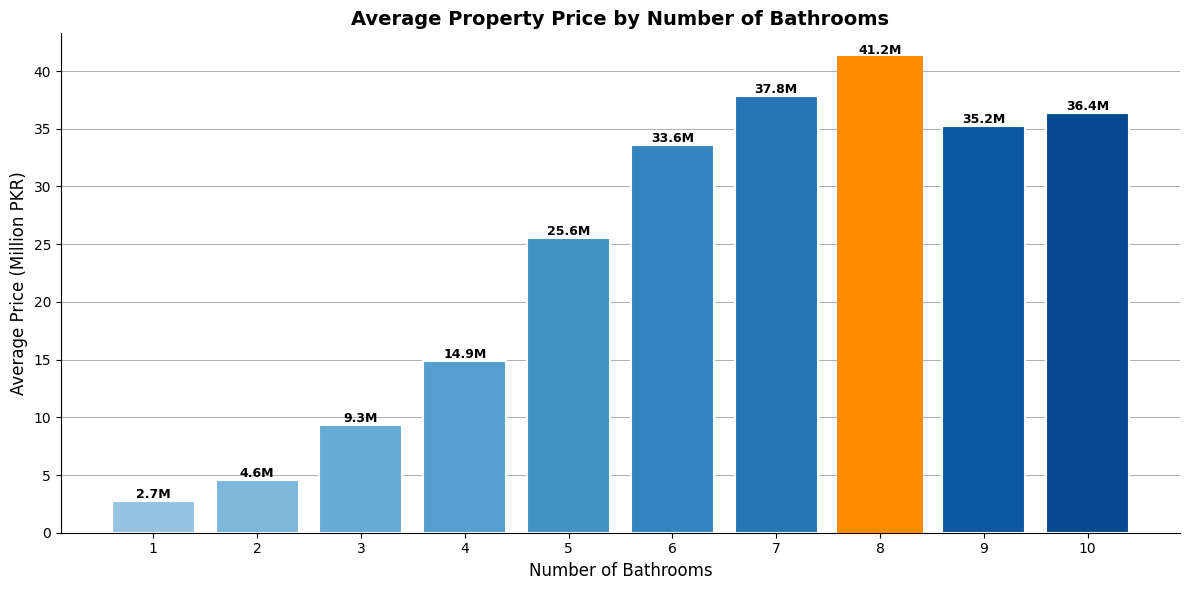


PRICE vs BATHROOMS ANALYSIS
Total Properties Analyzed: 124,965

Average Price by Number of Bathrooms:
------------------------------------------------------------
1 Bathroom(s): PKR 2,749,646 (Count: 5,355)
2 Bathroom(s): PKR 4,597,886 (Count: 25,750)
3 Bathroom(s): PKR 9,340,315 (Count: 34,579)
4 Bathroom(s): PKR 14,919,510 (Count: 19,368)
5 Bathroom(s): PKR 25,557,045 (Count: 15,184)
6 Bathroom(s): PKR 33,550,325 (Count: 16,308)
7 Bathroom(s): PKR 37,836,576 (Count: 5,115)
8 Bathroom(s): PKR 41,207,468 (Count: 1,897)
9 Bathroom(s): PKR 35,225,351 (Count: 652)
10 Bathroom(s): PKR 36,385,909 (Count: 757)

Most Expensive: 8 bathrooms at PKR 41,207,468
Least Expensive: 1 bathroom(s) at PKR 2,749,646


In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# Load data
data = pd.read_csv(r"zameen-updated.csv")

# Ensure numeric values 
data['price'] = pd.to_numeric(data['price'], errors='coerce') 
data['baths'] = pd.to_numeric(data['baths'], errors='coerce') 

# Remove missing values
clean_data = data.dropna(subset=['price', 'baths'])

# Remove outliers for better visualization
# Keep values within 99th percentile
price_99 = clean_data['price'].quantile(0.99)
clean_data = clean_data[clean_data['price'] <= price_99]

# Filter to reasonable bath counts (1-10 baths)
clean_data = clean_data[(clean_data['baths'] >= 1) & (clean_data['baths'] <= 10)]

# Calculate average price by number of baths
avg_price_by_baths = (clean_data.groupby('baths')['price']
                          .mean()
                          .sort_index())

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Create color gradient from light to dark blue
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(avg_price_by_baths)))

bars = ax.bar(avg_price_by_baths.index, 
              avg_price_by_baths.values/1_000_000,
              color=colors,
              edgecolor='white',
              linewidth=1.5)

# Highlight the highest bar
max_idx = avg_price_by_baths.idxmax()
max_position = list(avg_price_by_baths.index).index(max_idx)
bars[max_position].set_color('darkorange')

# Titles and labels
ax.set_title('Average Property Price by Number of Bathrooms', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Bathrooms', fontsize=12)
ax.set_ylabel('Average Price (Million PKR)', fontsize=12)

# Set x-axis to show integer bath counts
ax.set_xticks(avg_price_by_baths.index)

# Place grid behind bars
ax.set_axisbelow(True)
ax.grid(axis='y', color='#999999', linestyle='-', linewidth=0.7, alpha=0.8)

# Clean frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels on top of bars
for i, (bath, price) in enumerate(avg_price_by_baths.items()):
    ax.text(bath, price/1_000_000, f'{price/1_000_000:.1f}M',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("PRICE vs BATHROOMS ANALYSIS")
print("="*60)
print(f"Total Properties Analyzed: {len(clean_data):,}")
print(f"\nAverage Price by Number of Bathrooms:")
print("-"*60)
for baths, price in avg_price_by_baths.items():
    count = len(clean_data[clean_data['baths'] == baths])
    print(f"{int(baths)} Bathroom(s): PKR {price:,.0f} (Count: {count:,})")
print("="*60)
print(f"\nMost Expensive: {int(max_idx)} bathrooms at PKR {avg_price_by_baths[max_idx]:,.0f}")
print(f"Least Expensive: {int(avg_price_by_baths.idxmin())} bathroom(s) at PKR {avg_price_by_baths.min():,.0f}")
print("="*60)